# INERZIA DI UN DISCO + ANELLO

## RACCOLTA DATI

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione2 import RettaInterpolata

import os

dir_path = os.path.abspath('') #os.path.dirname(os.path.realpath(__file__))
FILE = dir_path + '/../CSV/' + 'disco_anello.csv'
fr = pd.read_csv(FILE)

alfa1 = np.mean(fr['Alfa1 (1-5)']) # accellerazioni angolari con relativi errori di misura
sigma_alfa1 = np.std(fr['Alfa1 (1-5)'])

alfa2 = np.mean(fr["Alfa2 (7-11)"])
sigma_alfa2 = np.std(fr["Alfa2 (7-11)"])

alfa3 = np.mean(fr['alfa3'])
sigma_alfa3 = np.std(fr['alfa3'])

m = np.array([50,70,85]) * 0.001 # masse campione in Kg
alfa = np.array([alfa1,alfa2,alfa3]) # gr/s^2

raggio = 0.01 # m (braccio)
alfa = (alfa/180) * np.pi # rad/s^2
sigma_alfa = np.array([sigma_alfa1,sigma_alfa2,sigma_alfa3]) # grd/s^2
sigma_alfa = (sigma_alfa/180)*np.pi #rad/s^2

## ANALISI DATI


linearità: 
B: 392.08585790748253
sigmaB: [11.57297541 13.17010613 11.4009634 ]
A: -0.9151185807752981
sigmaA: [0.80803903 0.91955262 0.79602895]
sigmaY: [0.28738908 0.32705027 0.28311755]

chiquadro osservato: 1.2037281001140483
chiquadro ridotto: 1.2037281001140483
gradi di libertà: 1
vincoli: 2
        


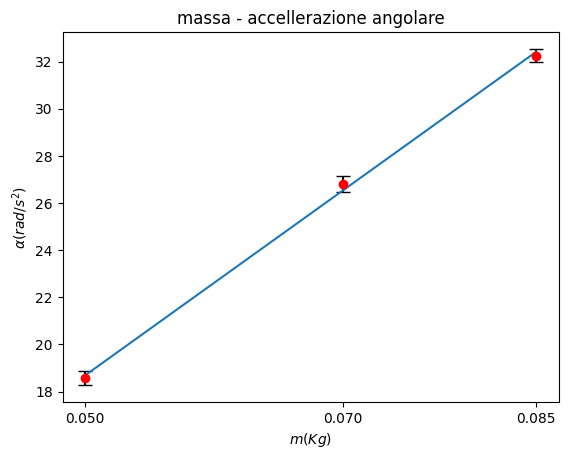

In [27]:
r = RettaInterpolata(m, alfa, sigma_alfa) # interpolazione
plt.errorbar(m,alfa,yerr=r.sigmaY,fmt='o',color='red',ecolor='black',capsize=5)
plt.plot(r.best_x,r.best_y) # array alta densità
plt.xticks(m)
plt.title("massa - accellerazione angolare")
plt.ylabel("$\\alpha (rad/s^2)$")
plt.xlabel("$m (Kg)$")
# plt.show()

print(r)